# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [2]:
# (1) # Your Code goes here:
import os
import pandas as pd

data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

print("Shape: ", auto_numeric.shape)
auto_numeric.describe()

Shape:  (159, 16)


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


(2) ***Your answer goes here:***

This data set contains 159 data points (or car data in this case) in 16 diferent columns.
We can also appreciate that some features have a substantial different mean and median (50%), for example in "torque". This can indicate the presence of outliers.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

Correlation coefficient between each attribute and price
normalized-losses :  0.015367647423658213
wheel-base :  0.42351059515038575
length :  0.5128830452653906
width :  0.5243255521274494
height :  0.13956255898680378
engine-size :  0.7151245901914791
bore :  0.3652072892128543
stroke :  0.127834031932651
compression-ratio :  0.12568322167466553
engine-power :  0.44396859146316336
peak-rpm :  -0.09934529106318549
city-mpg :  -0.35678950067247023
highway-mpg :  -0.4384674317144328
mean-effective-pressure :  -0.10486005065048887
torque :  0.1014345813072746
price :  1.0


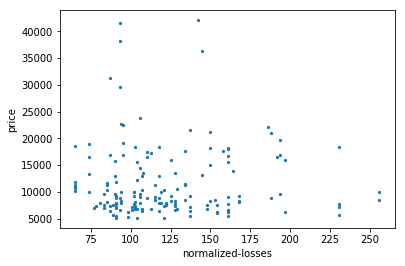

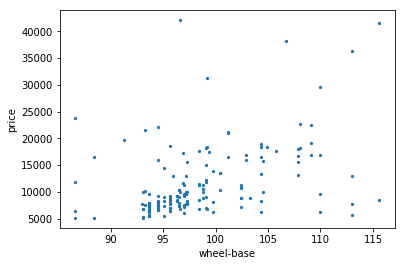

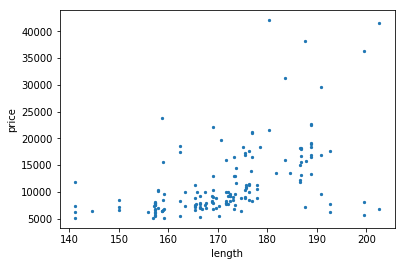

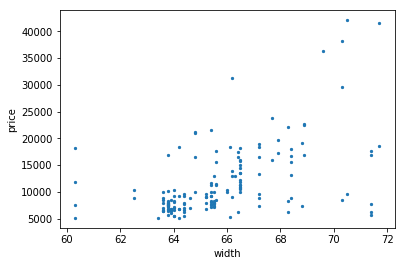

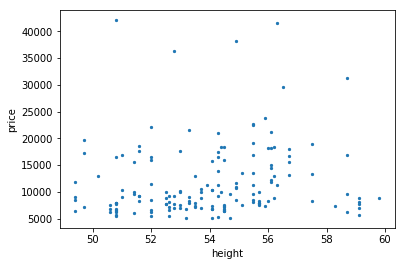

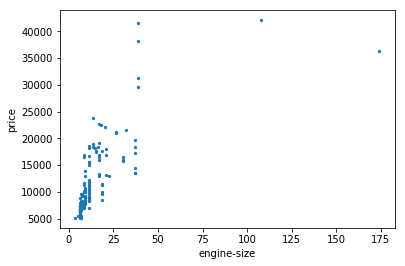

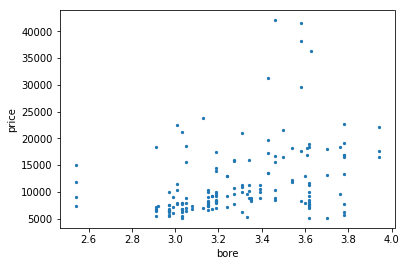

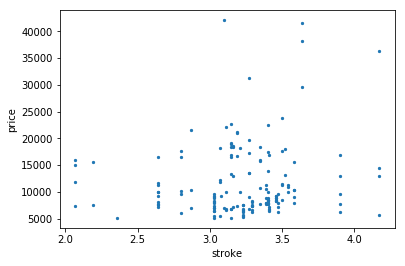

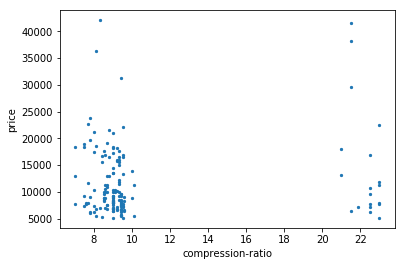

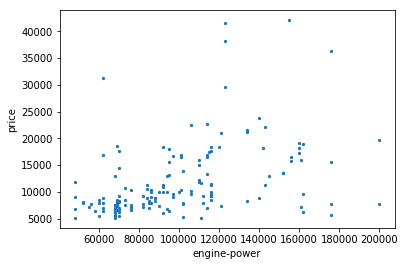

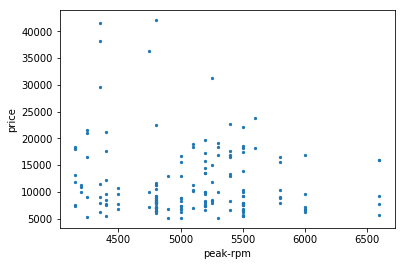

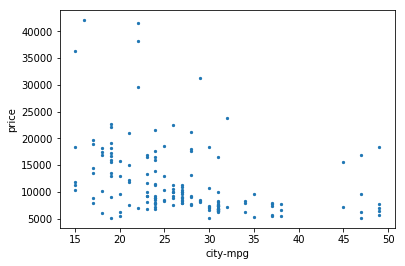

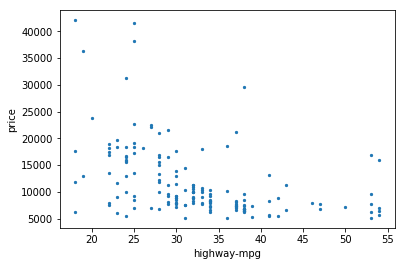

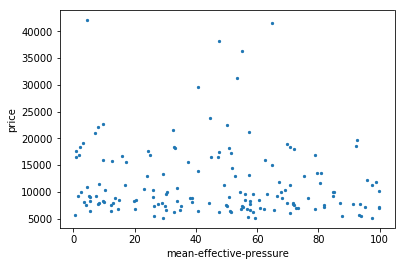

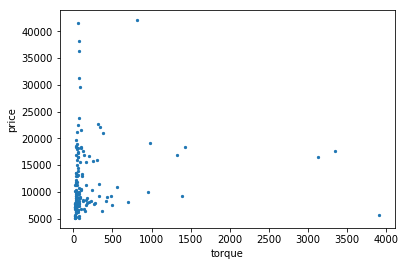

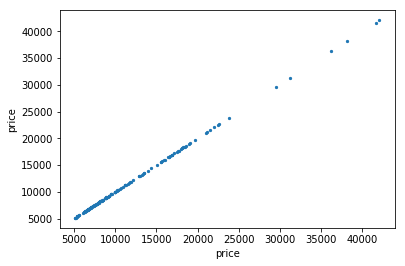

In [3]:
# (1) # Your Code goes here:
import numpy as np
import seaborn as sns

print("Correlation coefficient between each attribute and price")
for columns in auto_numeric:
    corrCoe = auto_numeric["price"].corr(auto_numeric[columns])
    print(columns,": ",corrCoe)
    auto_numeric.plot(kind = "scatter", x = columns, y = "price", s=5)
        

(2) ***Your answer goes here:***
Most useful atributes to predict the price are: engine-size, length, width, engine-power, wheel-base.
The most useful tool is the Correlation Coefficient, more precise than trying to find a good trend graphicly. And we have used correlation coefficient to decide the best attributes.

C:\Users\toti\Anaconda2\envs\py3iaml\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\toti\Anaconda2\envs\py3iaml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


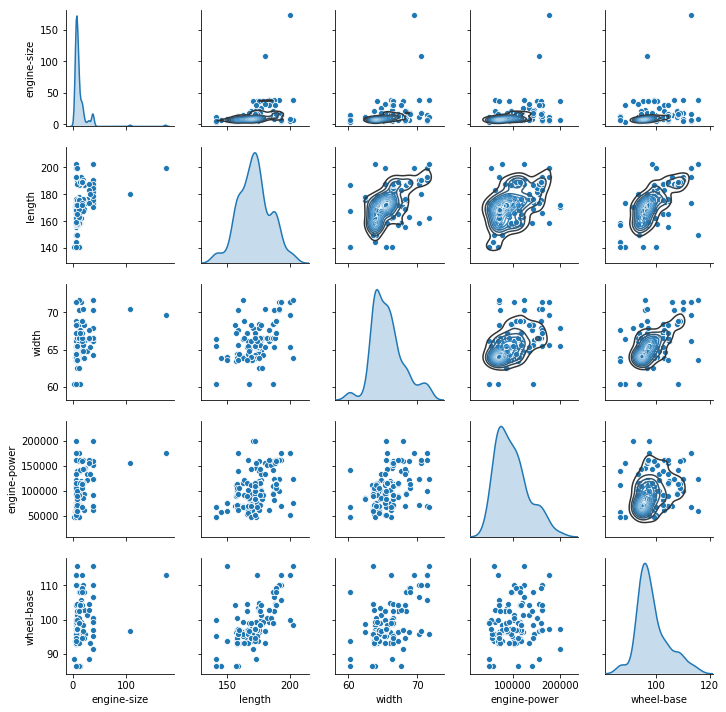

In [4]:
# (3) # Your Code goes here:
import matplotlib.pyplot as plt
attributes = ["engine-size", "length", "width", "engine-power", "wheel-base"]
sns.pairplot(auto_numeric[attributes], palette = "Set3", diag_kind = "kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")
plt.show()

(4) ***Your answer goes here:***

Engine-size seems to have a linear relation with every other attribute.
There is also a good possitive relationship bewteen Lenght and Wheel-base, and another (not as good as the one before) with Width and Wheel-base.


(5) ***Your answer goes here:***
The attributes that I would remove are Engine-power and Width because these are the attributes that give us worst relation with the other attributes.

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

Correlation Coefficient:  0.44396859146316336


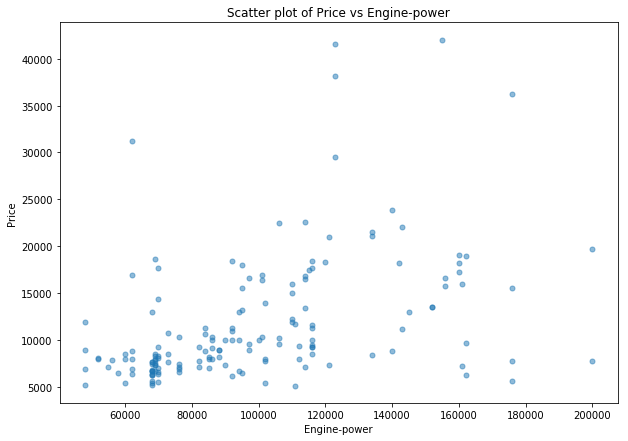

In [5]:
# (1) # Your Code goes here:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()

auto_numeric.plot(ax=ax, kind = "scatter", x = "engine-power", y = "price", s=25, alpha = 0.5)
ax.set_title("Scatter plot of Price vs Engine-power")
ax.set_xlabel("Engine-power")
ax.set_ylabel("Price")

print("Correlation Coefficient: ",auto_numeric["price"].corr(auto_numeric["engine-power"]))
plt.show()

(2) ***Your answer goes here:***
Engine-power is not the best attribute to predict the Price. We can see that the points at the end are very scattered, but a positive "stronger" trend can be considerated in the beginning, where many of the data points are present.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

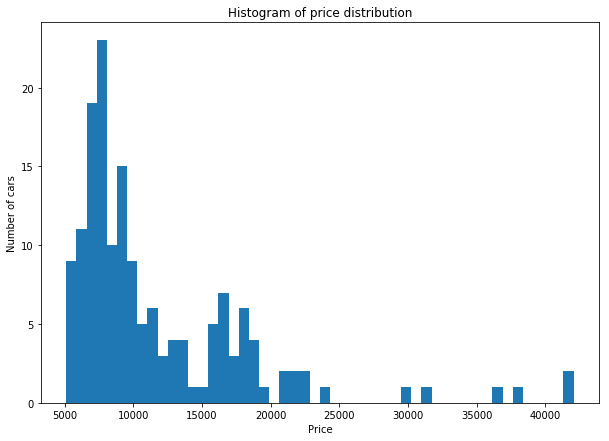

In [6]:
# (1) # Your Code goes here:

fig = plt.figure(figsize=(10,7))
ax = fig.gca()
auto_numeric["price"].plot.hist(ax=ax, bins = 50 )
ax.set_title("Histogram of price distribution")
ax.set_xlabel("Price")
ax.set_ylabel("Number of cars")
plt.show()

(2) ***Your answer goes here:***
Price is not going to be easy to model using linear regression neither because it is skewed to the left with many values at the right of the mean, a really long tail with some outliers we could say.
I would apply a Radial Basis Function or logarithm function to squash the distribution of the data to get a better fit for a linear. It is not conclusive because we have not yet performed any computations.


### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [7]:
# Your Code goes here:
from sklearn.model_selection import train_test_split
y = auto_numeric[["price"]] #dependent variable
x = auto_numeric[["engine-power"]] #independent variable

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = 0.8, test_size = 0.2)


### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [8]:
# Your Code goes here:

baseline = y_train.mean()
print("Our baseline is: ", baseline)

Our baseline is:  price    11853.267717
dtype: float64


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [9]:
# (1) # Your Code goes here:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regclf = LinearRegression()
regclf.fit(X_train, y_train)

y_pred = regclf.predict(X_train)

print("Coefficients: ", regclf.coef_)
print("Intercept: ",regclf.intercept_) #This means that for every one unit of change,
                                       #the change in the score is about 2823.


Coefficients:  [[0.08988389]]
Intercept:  [2823.1218911]


## (2) ***Your answer goes here:***

With the results we can see that the linear regression model intercepts the y axis at 2823.121 and its coefficients (is interpreted as the difference in the predicted value in Y for each one-unit difference in X) are 0.089.
But to a better metric to predict the attribute price I should use Mean Squared Error metric. Because the previous metrics do not tell us very well how good the relation between these attributes is.


### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

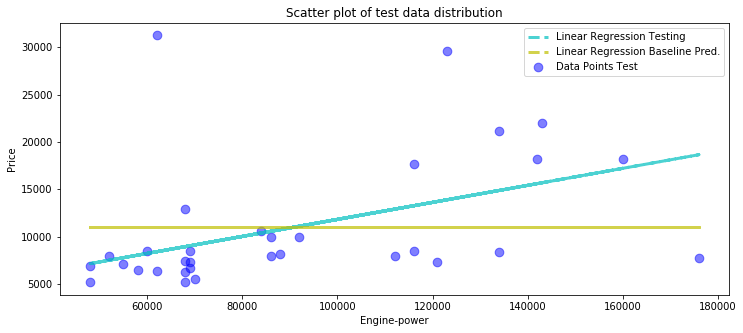

In [10]:
# (1) # Your Code goes here:
from matplotlib.legend import DraggableLegend
from sklearn.dummy import DummyRegressor
from sklearn.utils import check_X_y

fig = plt.figure(figsize=(12,5))
ax = fig.gca()
ax.set_title("Scatter plot of test data distribution")
ax.set_xlabel("Engine-power")
ax.set_ylabel("Price")

y_pred = regclf.predict(X_test)

plt.scatter(X_test, y_test,  color='blue', label = "Data Points Test", s=75, alpha = 0.5)
plt.plot(X_test, y_pred, 'k--', color='c', linewidth=3, alpha = 0.7, label = "Linear Regression Testing")

###########################################   BASELINE PREDICTOR ###########################################
##MEAN
y_mean = np.full((len(X_test), 1), y_test.mean())

plt.plot(X_test,y_mean, 'k--', color='y', linewidth=3, alpha = 0.7, label = "Linear Regression Baseline Pred.")

plt.legend()
plt.show()


(2) ***Your answer goes here:***

The predictor line did better at describing than the baseline predictor. This is because it considers the cluster of points in the beginning and correlate with some of these points correctly.
Whereas the baseline predictor predicts a constant relation even though the plot has scatter points at the end and a cluster and not at the beginning.


### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

C:\Users\toti\Anaconda2\envs\py3iaml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


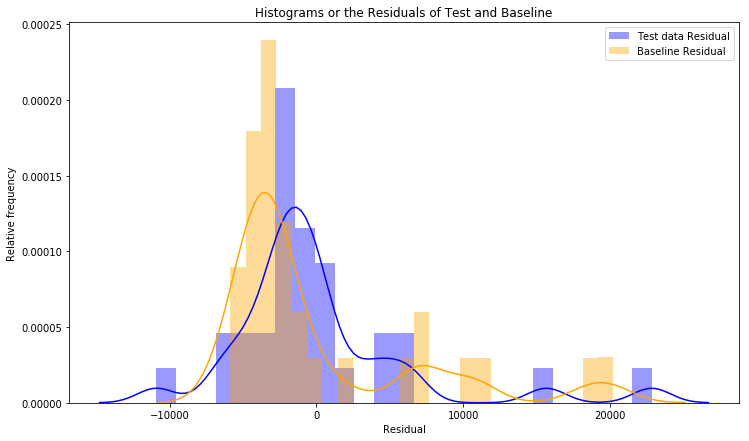

In [11]:
# (1) # Your Code goes here:

test_res = y_test - y_pred
baseline_res = y_test - y_mean

fig = plt.figure(figsize=(12,7))
ax = fig.gca()
ax.set_title("Histograms or the Residuals of Test and Baseline")
ax.set_xlabel("Residual")
ax.set_ylabel("Relative frequency")

sns.distplot(test_res, bins = 25, color = "b", label = "Test data Residual")
sns.distplot(baseline_res, bins = 25, color = "orange", label = "Baseline Residual")

plt.legend()
plt.show()

In [12]:
# (2) # Your Code goes here:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

print("R2 Score Test: ", r2_score(y_test, y_pred))
print("SMSE Test: ", sqrt(mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average')),"\n")

print("R2 Score Baseline: ", r2_score(y_test, y_mean))
print("SMSE Baseline: ", sqrt(mean_squared_error(y_test, y_mean, sample_weight=None, multioutput='uniform_average')))

R2 Score Test:  0.16852372539951466
SMSE Test:  6153.70386613629 

R2 Score Baseline:  0.0
SMSE Baseline:  6748.56852616492


(3) ***Your answer goes here:***
The histogram shows us that the Test Data Residual is closer to 0 than the Baseline predictor. As the residual is closer to 0 it means that the true and the predicted labels are more similar, and therefore less error.
The MSE is also lower in the test data, meaning that the difference between the real and predicted points is smaller than the Baseline.
And finally, the R2 Coefficient of Determination is bigger and closer to 1 in the test data than in the Baseline.
And because of all the past statements we can confirm that the test data is better than the mean baseline.

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***
That we can confirm that our data is biased because we are only taking into acount the engine-power to predict the price. And because of that the MSE is too high and R2 is very low.

In [13]:
# (2) # Your Code goes here:
from sklearn.model_selection import KFold, cross_val_predict
kf = KFold(n_splits=5,shuffle=True, random_state=0)

In [14]:
# (3) # Your Code goes here:

y = auto_numeric[["price"]] #dependent variable
x = auto_numeric[["engine-power"]] #independent variable

reg2 = LinearRegression()
y_pred2 = cross_val_predict(reg2, x, y, cv=kf)
r2_reg2 = r2_score(y, y_pred2)
print("R2: ", r2_reg2)
rmse_reg2 = sqrt(mean_squared_error(y, y_pred2, sample_weight=None, multioutput='uniform_average'))
print("RMSE: ", rmse_reg2)

R2:  0.1730052709757075
RMSE:  6114.452118615525


(4) ***Your answer goes here:*** 
Now that we have used more data to train the performance of the Regression has improved a little with a better R2 and lower RMSE, but because we are only using one attribute to describe the price, the correlation coefficient won't get better.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [15]:
# (1) # Your Code goes here:

In [16]:
# (2) Show any working code here...
# Your Code goes here:

(2) - Final Conclusion(s)
***Your answer goes here:***

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [17]:
# (1) # Your Code goes here:
def trainMultiVariate(df):
    x = df.drop(["price"], axis = 1)
    y = df[["price"]]

    regr_Multi = LinearRegression()
    kf = KFold(n_splits=5,shuffle=True, random_state=0)
    regr_Multi = regr_Multi.fit(x, y)
    y_pred_Multi = cross_val_predict(regr_Multi, x, y, cv=kf)

    r2_reg_Multi = r2_score(y, y_pred_Multi)
    print("R2: ", r2_reg_Multi)
    rmse_reg_Multi = sqrt(mean_squared_error(y, y_pred_Multi, sample_weight=None, multioutput='uniform_average'))
    print("RMSE: ", rmse_reg_Multi)
    
trainMultiVariate(auto_numeric)

R2:  0.48613798445730905
RMSE:  4819.804642834616


(2) ***Your answer goes here:***
The best R2 and RMSE we had obtained was in exercise 2.8 that was:
R2: 0.1730052709757075
RMSE: 6114.452118615525
Now thanks to the multivariate Linear Regression we have been able to compare other variables, not only Engine-power and Price, and thus, we have obtained a greater R2 and a more accurate Squared Mean Squared Error.

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

C:\Users\toti\Anaconda2\envs\py3iaml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


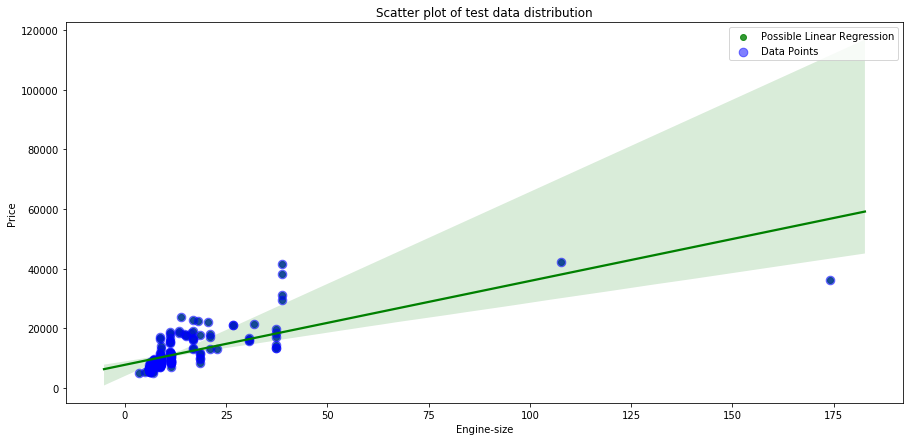

In [18]:
# (1) # Your Code goes here: 
def plot_enginesize_price(df):
    fig = plt.figure(figsize=(15,7))
    ax = fig.gca()

    sns.regplot(x="engine-size", y="price", data=df, label = "Possible Linear Regression", color = "g")
    plt.scatter(df[["engine-size"]],df[["price"]], color='b', label = "Data Points", s=75, alpha = 0.5)

    ax.set_title("Scatter plot of test data distribution")
    ax.set_xlabel("Engine-size")
    ax.set_ylabel("Price")

    plt.legend()
    plt.show()
    
    
plot_enginesize_price(auto_numeric)


(2) ***Your answer goes here:***

No, because the data seems to follow a logarithmic distribution. A linear could fit at the beginning due to the proximity of the points, but due to how scattered they are at bigger Engine-sizes, the linear regression won't fit that well after all.

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

C:\Users\toti\Anaconda2\envs\py3iaml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


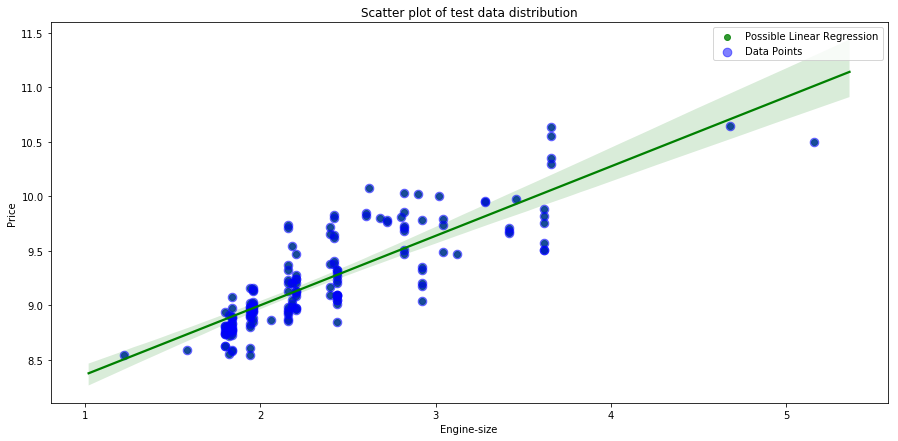

In [24]:
# (1) # Your Code goes here:
auto_numeric_log = auto_numeric.applymap(np.log) #I have applied log because it is really intuitive and easy to apply.

plot_enginesize_price(auto_numeric_log) #Plot from the previous exercice.


In [20]:
# (2) # Your Code goes here:
trainMultiVariate(auto_numeric_log)

R2:  0.8203407585961666
RMSE:  0.19475333091773717


***Your answer goes here:***
Due to the transformation we have applied to our data the model has become more linear like. The axis had changed as well, and the data got squeezed, with closer datapoints. 
And as we see for the variance of the trend "Possible Linear Reg", in the second plot with the data transform, it fits better to the Linear Regression.
Moreover, both R2 and RMSE have improve substantially, meaning that this relation has get better.

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [21]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

In [22]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***